# Simple concepts and formulas if any

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy import stats


### Prob vs Likelihood & MLE

Say, we have $\sigma = 0.2$ and Data ($D$) and we need to find or estimate $\mu$

Assumption: $x \in \mathrm{N}(\mu, \sigma)$

Text(0.5, 0, 'μ')

Text(0, 0.5, 'Relative Likelihood')

Text(0.5, 1.0, 'Probability vs Likelihood under i.i.d. samples')

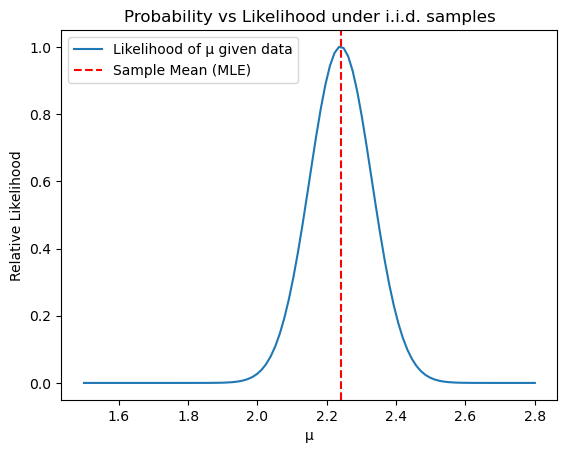

In [8]:
data = np.array([2.1, 2.4, 2.5, 1.9, 2.3])
sigma = 0.2

def likelihood(mu):
    return np.prod(stats.norm.pdf(data, loc=mu, scale=sigma))

mu_vals = np.linspace(1.5, 2.8, 100)
likelihood_vals = [likelihood(m) for m in mu_vals]

likelihood_vals = likelihood_vals / np.max(likelihood_vals)

# d_likelihood = [likelihood(d) for d in data]
# plt.scatter(data,d_likelihood)
plt.plot(mu_vals, likelihood_vals, label='Likelihood of μ given data')
plt.axvline(x=np.mean(data), color='r', linestyle='--', label='Sample Mean (MLE)')
plt.xlabel('μ')
plt.ylabel('Relative Likelihood')
plt.title('Probability vs Likelihood under i.i.d. samples')
plt.legend()
plt.show()

### Bayesian way of MLE

reference : https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote04.html

Text(0.5, 1.0, 'Bayesian Update for Coin Toss')

Text(0.5, 0, '$\\theta$ (P(Head))')

Text(0, 0.5, 'Density')

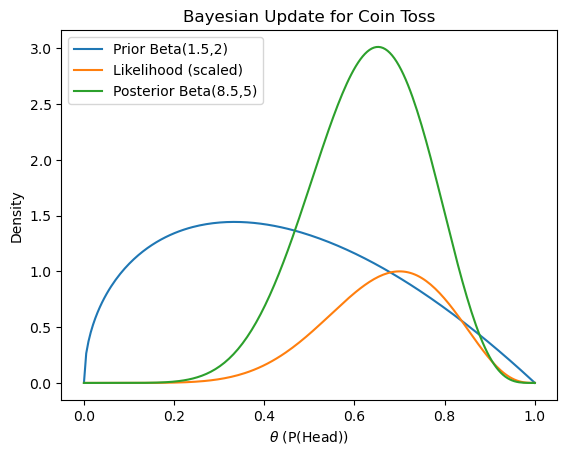

In [ ]:
alpha, beta_ = 1.5, 2

# Observed data: k heads out of n flips
n, k = 10, 7

alpha_post = alpha + k
beta_post = beta_ + (n - k)

theta = np.linspace(0, 1, 200)

plt.plot(theta, stats.beta.pdf(theta, alpha, beta_), label=f'Prior Beta({alpha},{beta_})')
plt.plot(theta, theta**k * (1-theta)**(n-k) / np.max(theta**k * (1-theta)**(n-k)), label='Likelihood (scaled)')
plt.plot(theta, stats.beta.pdf(theta, alpha_post, beta_post), label=f'Posterior Beta({alpha_post},{beta_post})')

plt.title('Bayesian Update for Coin Toss')
plt.xlabel('$\\theta$ (P(Head))')
plt.ylabel('Density')
plt.legend()
plt.show()
